$\textbf{Ising Model of a Ferromagnet in 2 Dimensions}$

The Ising Model is a mathematical model of ferromagnet.
It considers a lattice of particles that can be in either a spin-up or spin-down state.

The spin interactions are governed by the Hamiltonian:

<center>$\mathcal{H} = -J\sum\limits_{neighbours}S_i\cdot S_j$</center>

Of which the sum is over the nearest neighbours of the particle. <br>
The strength of the interaction is given by $J$. <br>
$S_{i , j}$ represents the spins of the particles.

Here, the Ising model will be simulated on a square grid of size NxN.

A particle in a spin up configuration will be represented by a 1. <br>
A particle in the spin down configuration will be represented by a -1. <br>

This simulation will use the <i>Metropolis algorithm</i>, which is as follows:

<ol>
    <li>Initalise a lattice of size $NxN$ with a random distribution of spins.</li>
    <li>Select a particle at random.</li>
    <li>Consider flipping the spin state of the selected particle. If, the change in energy, $\Delta E$ is
        <ol>
            <li>Negative, then flip the state.</li>
            <li>Positive, then flip the state if the Boltzmann factor $\exp{\frac{\Delta E}{kT}}$ is greater than a randomly generated probability (weighted coin toss).</li>
         </ol>
     </li>
     <li>Repeat step 2 until the desired number of steps are completed.</li>
</ol>

The Magnetisation is calculated by:

<center>$M = \frac{1}{N}\sum S_i$</center>

TODO: Multiple simulations + plot better magnetisation curve, heat capacity.

In [1]:
#NAME: Ising Model
#DESCRIPTION: 2D Ising Ferromagnet nearest neighbour interactions.

# tkagg/%matplotlibnotebook for jupyter compatability
import matplotlib
matplotlib.use('tkagg')
from matplotlib import pyplot as plt
from matplotlib import animation, rc
%matplotlib notebook

from IPython.display import HTML
from IPython.display import display
from ipywidgets import widgets
import numpy as np
import random

C:\Anaconda2\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
"""
Parameters:

N: size of grid
M: number of steps to take
J: energy coupling of interaction
k: Boltzmann constant (naturalised)
R: Interval between recordings

"""
N = 100
M = 10 ** 6
J = 1
k = 1
T = 2.0
R = 100

In [5]:
"""
Functions
"""
def boltzmann(E, T):
    """
    Calculate the Boltzmann factor
    
    Parameters
    ----------
    E : float
        The energy of a state.
    T : float
        The temperature of the system.
    """
    return np.exp(-E * (k*T) ** (-1)) if T > 0 else 0

def energy(grid, x, y):
    """
    Calculate the Ising Hamiltonian from nearest neighbours.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    x : int
        Position of a particle, given as the first index of the array. 
    y : int
        Position of a particle, given as the second index of the array.
    """
    # Compute factors for Right, Left, Up, Down nearest neighbours given periodic boundary conditions
    size = N
    sum = grid[(x+1)%size][y%size] + grid[(x-1)%size][y%size] + grid[x%size][(y+1)%size] + grid[x%size][(y-1)%size]

    return -J * grid[x][y]*sum

def magnetisation(grid):
    """
    Compute the Magnetisation of the grid.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    """
    return  N ** (-1) * np.sum(grid)

def average_energy(grid):
    """
    Iterate over the entire lattice and calculate the average energy.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles
    """
    sum = 0
    size = len(grid)
    for i in range(size):
        for j in range(size):
            sum = sum + energy(grid, i, j)
    print sum/size
    return sum/size

def average_squared_energy(grid):
    """
    Iterate over the entire lattice and calculate the average squared energy.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles
    """
    sum = 0
    size = len(grid)
    for i in range(size):
        for j in range(size):
            E = energy(grid, i, j)
            sum = sum + E ** 2
    print sum/size
    return sum/size

def heat_capacity(grid, temp):
    """
    Calculate the heat capacity of the lattice at a given Temperature.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles
    temp : float
        Temperature of the system
    
    """
    return ((len(grid) * k * temp) ** (-2)) * (average_squared_energy(grid) - average_energy(grid) ** 2) 

def lattice(size):
    """
    Returns a square lattice as an array.
    
    Parameters
    ----------
    size : int
    
    """
    return (-1) ** np.random.randint(2, size=(N,N))

def step(grid, temp):
    """
    The Monte-Carlo step stage of the algorithm.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    temp : float
        The temperature of the lattice
    """
    # Select a random position on the grid
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
     
    E = -2. * energy(grid, i, j)

    # If energy change is negative, flip.
    if E <= 0.:
        grid[i][j] = -grid[i][j]
    # If energy change is positive, flip according to Boltzmann.
    elif boltzmann(E, temp) > random.random():
        grid[i][j] = -grid[i][j]
    
    return grid

<IPython.core.display.Javascript object>


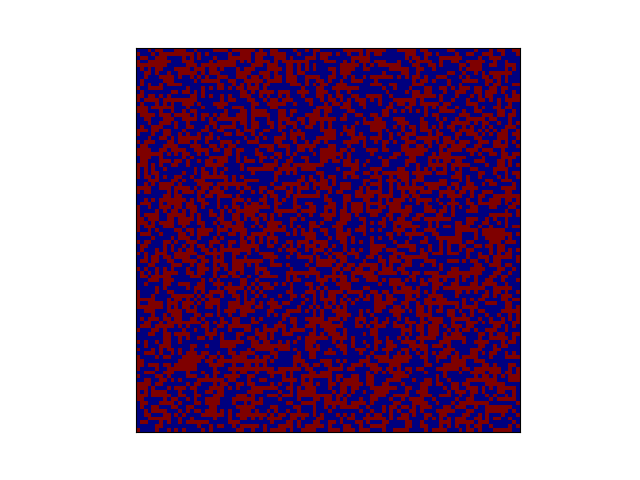

In [33]:
# Create a Grid with random distribution of spins

grid = lattice(N)

# Prepare figures for animation
fig = plt.figure()
ax1 = plt.subplot(111)

# Presentation
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# Image containing the lattice
im = ax1.imshow(grid, animated=True, interpolation='none')

def animate(i):
    """
    Parameters
    ----------
    i : int
        The stage of the animation.
    """
    im.set_array(step(grid, T))
    return im,

ani = animation.FuncAnimation(fig, animate, frames=500, interval=1, blit=True)


Widgets for controlling the size of the grid and the temperature.
The Curie Temperature $T_c$ for the 2D Ising model is given by:

<center>$\frac{k_b T_c}{J} = \frac{2}{ln(2 + \sqrt(2))}$</center>

Which is approximately 2.269.

Below this temperature, one expects a phrase transition. Magnetic domains will begin to form. With support from the environment, it becomes increasingly more favourable to flip a spin to a higher energy state above this temperature. In this case, the net magnetisation drops to zero.

To determine the magnetisation accurately, one would need to run many simulations, rather than a live one.

In [5]:
""" Widgets for controlling the demonstration """
def set_t(Temperature):
    """
    Parameters
    ----------
    Temperature : float
        The new temperature of the system.
    """
    global T
    T = Temperature
widgets.interact(set_t,Temperature=(0.0,10.0,0.01))

def set_size(Size):
    """
    Parameters
    ----------
    Size : int
        Sets the new size of the lattice.
    """
    global N
    N = int(Size)
    plt.legend()
widgets.interact(set_size, Size=('25', '50', '100', '250', '500'))

button = widgets.Button(description="Restart")
display(button)
def on_button_clicked(b):
    """
    Generates a new random grid.
    """
    global grid
    grid = (-1) ** np.random.randint(2, size=(N,N))
    plt.legend()
    plt.show()
button.on_click(on_button_clicked)

Here, the Magnetisation will be calculated by running the Ising model simulation over multiple different temperatures.

The results will be plotted live on the graph below. The critical temperature is marked by a red line.

<IPython.core.display.Javascript object>


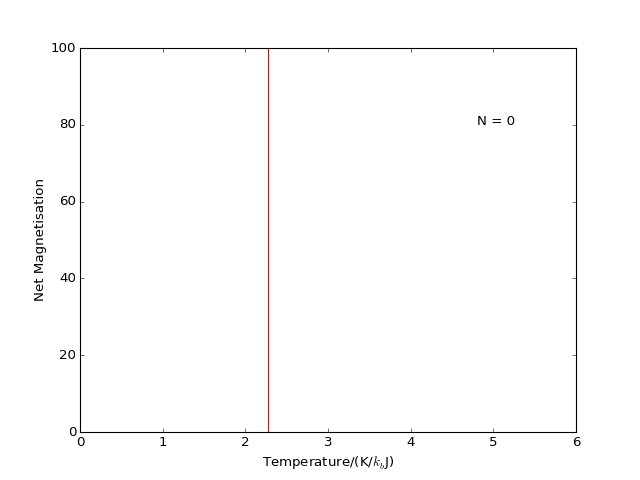

KeyboardInterrupt: 

In [8]:
fig2 = plt.figure()
magn_graph, = plt.plot([], [])
ax = plt.gca()
ax.set_xlabel(r'Temperature/(K/$k_b$J)')
ax.set_ylabel('Net Magnetisation')
plt.axvline(2.269, color='red')

def find_magnetisations(initial_temp, final_temp, dT, size, steps, to_draw, axes):
    """
    Simulates multiple
    
    Parameters
    ----------
    initial_temp : float
        The initial temperature (in Kelvin) of the simulation.
    final_temp : float
        The temperature (in Kelvin) at which to terminate the simulation.
    dT : float
        The temperature (in Kelvin) step.
    size : int
        The length of the lattice.
    steps : int
        The number of Monte Carlo steps taken in each iteration.
    to_draw : matplotlib.lines.Line2D
        The graph containing the data points.
    axes : matplotlib.axes._subplots.AxesSubplot
        The axes of the graph containing the data points.
    """
    
    # Presentation
    
    text = plt.text(0.8*final_temp, 0.8*size, r"N = 0")
    axes.set_xlim([0, final_temp])
    axes.set_ylim([0, size])
    
    # Physics
    iterations = int((final_temp - initial_temp)/dT)
    
    # One iterations contains 'steps' number of Monte-Carlo steps
    for i in range(0, iterations):
        grid = lattice(size)
        temp = initial_temp + i * dT
        
        # Contains one Ising simulation
        for j in range(0, steps):
            grid = step(grid, temp)
            
        to_draw.set_xdata(np.append(to_draw.get_xdata(), temp))
        to_draw.set_ydata(np.append(to_draw.get_ydata(), np.abs(magnetisation(grid))))
        
        text.set_text(r"N = " + str(i))
        plt.draw()
             
find_magnetisations(0.5, 6, 0.1, N, M, magn_graph, ax)
        
            
        